The longer you hold your stocks, the bigger the returns 
====================

What is the relation between "holding time" and positive returns in the stock market?

I wanted to reproduce the [following plot](https://g.foolcdn.com/misc-assets/hold%20stocks%20longer%20graph.png) made by the Motley Fool analysts:

![ddd](motley-fool_positive-returns.jpg) 

This plot basically explains why Warren Buffett is so rich. Because he is _old_. Of course, he is also damn smart. But let's not downplay the fact that he only became billionaire when he was 55 years old. And he bought his first stock when he was 11 years old (!!). 

Also, as I am Brazilian, I wanted to see whether the same pattern seen in S&P500 holds for [Ibovespa](https://en.wikipedia.org/wiki/Índice_Bovespa). 

How many trials in the monte carlo run?

In [55]:
n=5000

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Download data

S&P500, Ibovespa

In [3]:
periodo='max'
dt='1d'

In [4]:
#import nmmn.finance as nf
import yfinance as yf
import pandas as pd
import tqdm

In [5]:
ibovFull=yf.download(tickers="^BVSP", period=periodo, interval=dt, progress=False)
snpFull=yf.download(tickers="^GSPC", period=periodo, interval=dt, progress=False)

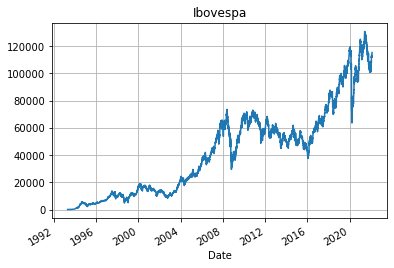

In [6]:
ibovFull['Close'].plot()
title("Ibovespa")
grid()

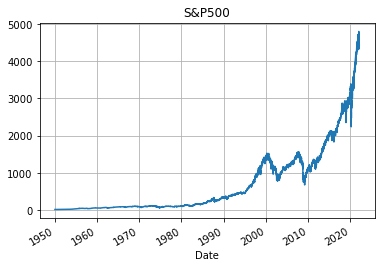

In [7]:
snpFull['Close'].plot()
title('S&P500')
grid()

In [14]:
ibov=ibovFull['Close']
snp=snpFull['Close']

# The functions that get the job done

In [42]:
def randReturn(ts,t=1, unit='y'):
    """
    Gets a random date in the TS, and computes the percentage return given the time units provided.
    """
    # gets a random date in the TS
    r=ts.sample()
    
    # gets start and end dates
    t0=r.index.date
    t0=t0[0].strftime('%Y-%m-%d')
    t1=r.index.date+pd.to_timedelta(t,unit=unit)
    i=ts.index.get_loc(t1[0].strftime('%Y-%m-%d'), method='nearest')
    t1=ts.index.date[i].strftime('%Y-%m-%d')
    
    return ts[t1]-ts[t0]

In [43]:
def positiveReturns(ts,t,unit):
    """
    Computes fraction of positive returns given the time parameters.
    """
    ret=[]

    for i in range(n):
        ret.append(randReturn(ts,t,unit))

    ret=array(ret)
    
    # what fraction of the returns are positive?
    return size(where(ret>0))/ret.size*100

# Calculations

Periods covered correspond to, respectively:

- 1 day
- 1 month
- 1 year
- 5 years
- 10 years
- 20 years

In [47]:
t=[1,30,365,5*365,10*365,20*365]
units=['d','d','d','d','d','d']

## S&P500

In [57]:
snpReturns=[]

for i in tqdm.tqdm(range(size(t))):
    snpReturns.append(positiveReturns(snp,t[i],units[i]))
    
snpReturns=array(snpReturns)

100%|███████████████████████████████████████████| 6/6 [01:50<00:00, 18.49s/it]


## IBOV

In [ ]:
ibovReturns=[]

for i in tqdm.tqdm(range(size(t))):
    ibovReturns.append(positiveReturns(snp,t[i],units[i]))
    
ibovReturns=array(ibovReturns)

  0%|                                                   | 0/6 [00:00<?, ?it/s]

# Results

In [ ]:
plot(t,snpReturns)
plot(t,ibovReturns)
plot(t,)

# Sandbox

In [128]:
i=where(ret>0)

In [131]:
size(i)/ret.size

0.612

In [17]:
ts=ibov

In [25]:
    # gets a random date in the TS
    r=ts.sample()
    
    # gets start and end dates
    t0=r.index.date
    t0=t0[0].strftime('%Y-%m-%d')
    t1=r.index.date+pd.to_timedelta(365,unit='d')
    

In [26]:
    i=ts.index.get_loc(t1[0].strftime('%Y-%m-%d'), method='nearest')
    t1=ts.index.date[i].strftime('%Y-%m-%d')

In [33]:
t0

'1999-01-28'

In [28]:
t1

'2000-01-28'

In [35]:
ts[t1]

16734.0

In [32]:
randReturn(ibov,1,'d')

KeyError: datetime.date(1995, 8, 3)